In [1]:
import pandas as pd 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from joblib import dump
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
X_train = pd.read_csv("../../../Split Data/Training Dataset/X_train #1.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("../../../Split Data/Training Dataset/y_train #1.csv", index_col=0)
X_val = pd.read_csv("../../../Split Data/Validation Dataset/X_val #1.csv").drop(columns=["Unnamed: 0"])
y_val = pd.read_csv("../../../Split Data/Validation Dataset/y_val #1.csv", index_col=0)
X_test = pd.read_csv("../../../Split Data/Testing Dataset/X_test #1.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("../../../Split Data/Testing Dataset/y_test #1.csv", index_col=0)

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_val_scaled = scaler.transform(X_val)   
X_test_scaled = scaler.transform(X_test) 

In [4]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32),
                    max_iter=1000, random_state=10, verbose = 1)


In [5]:
mlp.fit(X_train_scaled, y_train)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.34416254
Iteration 2, loss = 0.32898547
Iteration 3, loss = 0.32697354
Iteration 4, loss = 0.32539044
Iteration 5, loss = 0.32454149
Iteration 6, loss = 0.32367589
Iteration 7, loss = 0.32330014
Iteration 8, loss = 0.32243840
Iteration 9, loss = 0.32213842
Iteration 10, loss = 0.32155162
Iteration 11, loss = 0.32105096
Iteration 12, loss = 0.32077783
Iteration 13, loss = 0.32033918
Iteration 14, loss = 0.32016586
Iteration 15, loss = 0.31999007
Iteration 16, loss = 0.31988605
Iteration 17, loss = 0.31929002
Iteration 18, loss = 0.31919150
Iteration 19, loss = 0.31894224
Iteration 20, loss = 0.31895707
Iteration 21, loss = 0.31865429
Iteration 22, loss = 0.31862249
Iteration 23, loss = 0.31830253
Iteration 24, loss = 0.31834689
Iteration 25, loss = 0.31808767
Iteration 26, loss = 0.31794447
Iteration 27, loss = 0.31788786
Iteration 28, loss = 0.31795667
Iteration 29, loss = 0.31756062
Iteration 30, loss = 0.31771190
Iteration 31, loss = 0.31746874
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=10,
              verbose=1)

In [22]:
y_val_pred = mlp.predict(X_val_scaled)

In [ ]:
Accuracy = metrics.accuracy_score(y_val, y_val_pred)
Precision = metrics.precision_score(y_val, y_val_pred)
Recall = metrics.recall_score(y_val, y_val_pred)
F1_score = metrics.f1_score(y_val, y_val_pred)

In [8]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.8716938660664041, 'Precision': 0.8828612052936673, 'Recall': 0.5152888605170762, 'F1_score': 0.6507578200580457}


In [9]:
y_pred = mlp.predict(X_test_scaled)

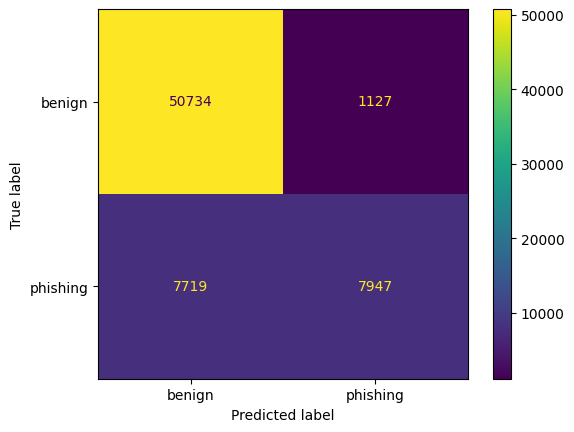

In [10]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["benign", "phishing"])                            
matrix.plot()

In [11]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
F1_score = metrics.f1_score(y_test, y_pred)

In [12]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.8690005479289765, 'Precision': 0.8757989861141724, 'Recall': 0.5072769054002298, 'F1_score': 0.6424413904607924}


In [13]:
df = pd.read_csv("../Metrics of Dataset #1.csv")

In [14]:
metrics = pd.DataFrame({"Model": "MLP", "Accuracy": [Accuracy], "Precision":[Precision], "Recall": [Recall], "F1_score": [F1_score]})

In [15]:
df = pd.concat([df, metrics], ignore_index=True)

In [16]:
df.head()

,Model,Accuracy,Precision,Recall,F1_score
0,LinearSVC,0.796748,0.840168,0.153007,0.258869
1,Random Forest,0.870289,0.872345,0.516469,0.648811
2,XGBoost,0.866320,0.876318,0.493425,0.631355
3,MLP,0.869001,0.875799,0.507277,0.642441


In [17]:
df.to_csv("../Metrics of Dataset #1.csv", index=False)

In [18]:
dump(mlp, 'MLP #1.joblib')

['MLP #1.joblib']